In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot as plt

In [2]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

In [3]:
X_train.shape   #有60000张图,每张是28*28像素大小

(60000, 28, 28)

In [4]:
y_train.shape   #60000表示那60000张图片分别表示什么数字

(60000,)

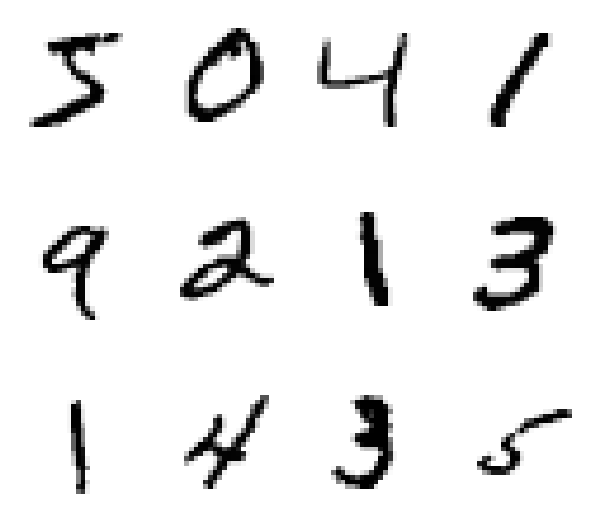

In [15]:
plt.figure(figsize=(6,6))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

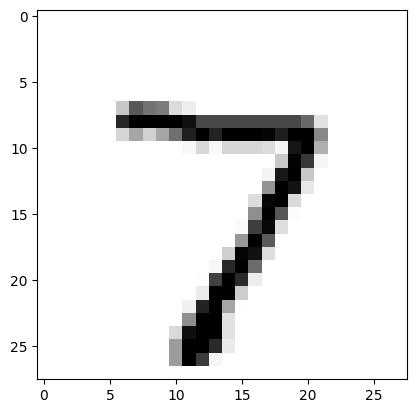

In [17]:
plt.imshow(X_valid[0], cmap='Greys')

In [27]:
X_valid[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [28]:
y_valid[0]

7

In [32]:
# 将图像拉伸为一维数组,并将类型转换为整数类型
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')

In [33]:
#除以255将数组里的数降到0-1之间
X_train /= 255
X_valid /= 255

In [34]:
X_valid[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [35]:
# 将代码从整数转换到独热编码
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_valid = keras.utils.to_categorical(y_valid, n_classes)

In [36]:
y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [37]:
#设计神经网络架构
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [39]:
#设置代价函数为平方损失函数,使用随机梯度下降,学习率设置为0.01
model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

In [42]:
#训练模型
model.fit(X_train, y_train, batch_size=128, epochs=200, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0862 - accuracy: 0.3458 - val_loss: 0.0859 - val_accuracy: 0.3508
Epoch 2/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0858 - accuracy: 0.3468 - val_loss: 0.0856 - val_accuracy: 0.3535
Epoch 3/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0855 - accuracy: 0.3480 - val_loss: 0.0852 - val_accuracy: 0.3541
Epoch 4/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0851 - accuracy: 0.3488 - val_loss: 0.0848 - val_accuracy: 0.3551
Epoch 5/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0847 - accuracy: 0.3495 - val_loss: 0.0844 - val_accuracy: 0.3574
Epoch 6/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0843 - accuracy: 0.3526 - val_loss: 0.0840 - val_accuracy: 0.3598
Epoch 7/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0839 - accuracy: 0.3548 - val_loss: 0.0836 - val_accuracy: 0.3626

In [44]:
model.evaluate(X_valid, y_valid)

  1/313 [..............................] - ETA: 5s - loss: 0.0235 - accuracy: 0.9375

313/313 [==============================] - 0s 1ms/step - loss: 0.0262 - accuracy: 0.8730


[0.02621365897357464, 0.8730000257492065]

In [45]:
model.evaluate(X_train, y_train)

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0272 - accuracy: 0.8633


[0.02716977149248123, 0.8632833361625671]